In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

### 1.problem statement

### To predict the SalePrice from other input variables

### 2.Data Gathering

In [2]:
df=pd.read_csv("practice_data.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.EDA

In [7]:
sorted(df["SaleCondition"].unique())

['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']

### 3.1 LabelEncoder

In [8]:
labelEnc=LabelEncoder()
df["SaleCondition"]=labelEnc.fit_transform(df["SaleCondition"])

In [9]:
df["SaleCondition"]

0       4
1       4
2       4
3       0
4       4
       ..
1455    4
1456    4
1457    4
1458    4
1459    4
Name: SaleCondition, Length: 1460, dtype: int32

In [10]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.024940,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.063372,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.034169,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.193703,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,0.017758,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.201044,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.221687,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.087925,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.032855,0.386420


<AxesSubplot:>

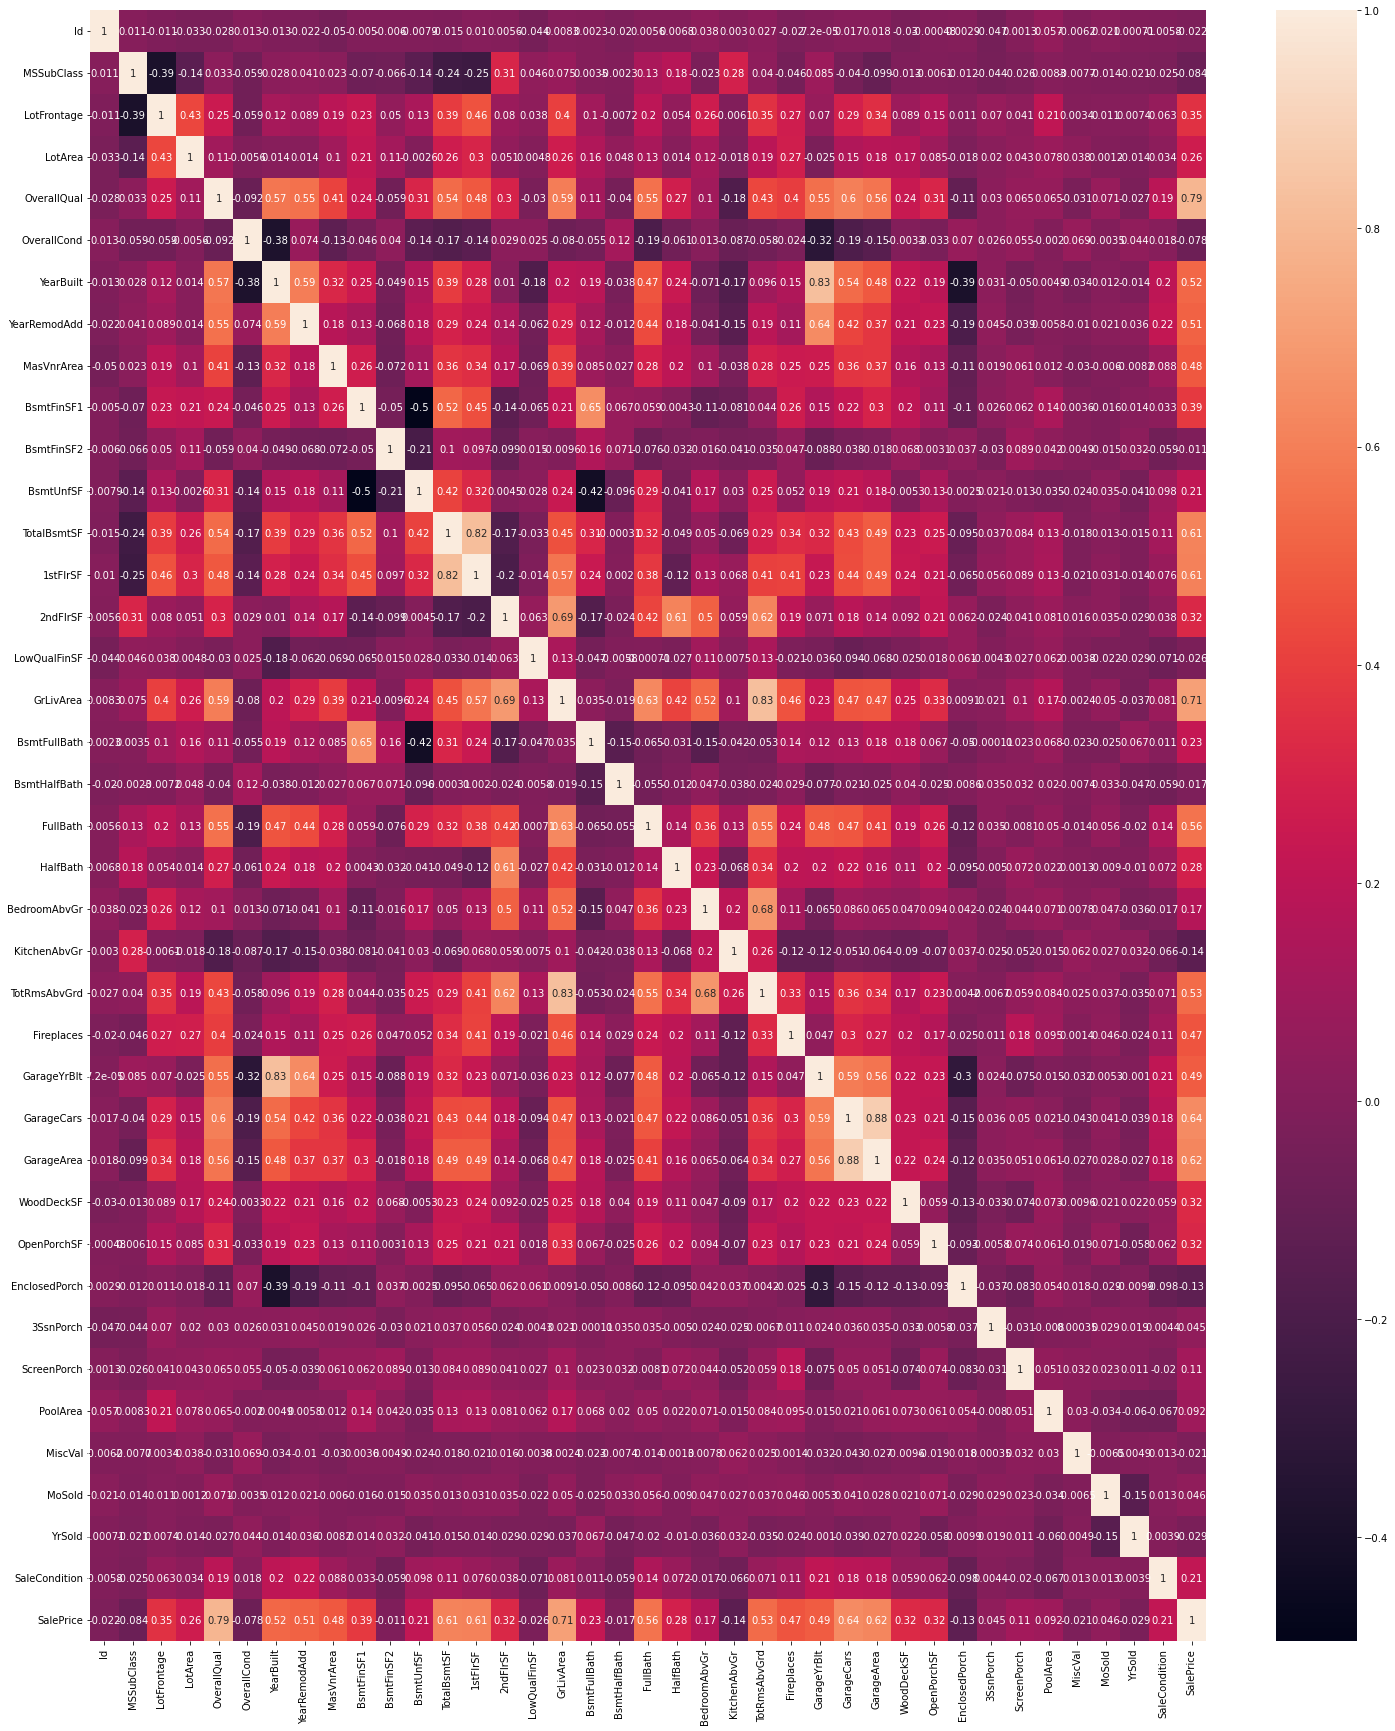

In [11]:
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### 4.feature_selection

In [13]:
df.drop(["Id","MSZoning","MSSubClass","Street","LotShape","LandContour","Utilities","SaleType"],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   Alley          91 non-null     object 
 3   LotConfig      1460 non-null   object 
 4   LandSlope      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   Condition1     1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [15]:
df.isna().sum()

LotFrontage       259
LotArea             0
Alley            1369
LotConfig           0
LandSlope           0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
SalePrice           0
Length: 73, dtype: int64

In [16]:
df.drop(["Alley","PoolQC","Fence","MiscFeature","LotConfig", "LandSlope","Neighborhood","Condition1","Condition2","BldgType"],axis=1,inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   HouseStyle     1460 non-null   object 
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   RoofStyle      1460 non-null   object 
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrType     1452 non-null   object 
 12  MasVnrArea     1452 non-null   float64
 13  ExterQual      1460 non-null   object 
 14  ExterCond      1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  BsmtQual       1423 non-null   object 
 17  BsmtCond       1423 non-null   object 
 18  BsmtExpo

In [18]:
df.drop(["HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure"],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinType1   1423 non-null   object 
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinType2   1422 non-null   object 
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  Heating        1460 non-null   object 
 14  HeatingQC      1460 non-null   object 
 15  CentralAir     1460 non-null   object 
 16  Electrical     1459 non-null   object 
 17  1stFlrSF       1460 non-null   int64  
 18  2ndFlrSF

In [20]:
df.drop(["BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical"],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [22]:
df.drop(["KitchenQual","Functional","GarageType","GarageFinish","GarageQual","GarageCond"],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [24]:
df.drop(["FireplaceQu"],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [26]:
sorted(df["PavedDrive"].unique())

['N', 'P', 'Y']

In [27]:
labelEnc1=LabelEncoder()
df["PavedDrive"]=labelEnc1.fit_transform(df["PavedDrive"])

In [28]:
df["PavedDrive"]

0       2
1       2
2       2
3       2
4       2
       ..
1455    2
1456    2
1457    2
1458    2
1459    2
Name: PavedDrive, Length: 1460, dtype: int32

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [30]:
df.shape


(1460, 38)

In [31]:
df.drop(["LotFrontage","GarageYrBlt"],axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   OverallQual    1460 non-null   int64  
 2   OverallCond    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [33]:
df.shape

(1460, 36)

In [34]:
df.isna().sum()

LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

### 5.feature_eng

In [35]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].median())

In [36]:
df.isna().sum()

LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

### 6.model_building/training

In [37]:
x=df.drop(["SalePrice"],axis=1)
y=df["SalePrice"]

In [38]:
x

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,8450,7,5,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,4
1,9600,6,8,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,4
2,11250,7,5,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,4
3,9550,7,5,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,0
4,14260,8,5,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,0.0,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,4
1456,13175,6,6,1978,1988,119.0,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,4
1457,9042,7,9,1941,2006,0.0,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,4
1458,9717,5,6,1950,1996,0.0,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,4


In [39]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
254,8400,5,6,1957,1957,0.0,922,0,392,1314,...,250,0,0,0,0,0,0,6,2010,4
1066,7837,6,7,1993,1994,0.0,0,0,799,799,...,0,40,0,0,0,0,0,5,2009,4
638,8777,5,7,1910,1950,0.0,0,0,796,796,...,328,0,164,0,0,0,0,5,2008,4
799,7200,5,7,1937,1950,252.0,569,0,162,731,...,0,0,264,0,0,0,0,6,2007,4
380,5000,5,6,1924,1950,0.0,218,0,808,1026,...,0,0,242,0,0,0,0,5,2010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9317,6,5,2006,2006,0.0,24,0,1290,1314,...,0,22,0,0,0,0,0,3,2007,4
1130,7804,4,3,1928,1950,0.0,622,0,500,1122,...,431,44,0,0,0,0,0,12,2009,4
1294,8172,5,7,1955,1990,0.0,167,0,697,864,...,0,0,0,0,0,0,0,4,2006,4
860,7642,7,8,1918,1998,0.0,0,0,912,912,...,0,240,0,0,0,0,0,6,2007,4


In [41]:
x_train.shape

(1168, 35)

In [42]:
y_train.shape

(1168,)

In [43]:
x_test

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
892,8414,6,8,1963,2003,0.0,663,0,396,1059,...,192,0,0,0,0,0,0,2,2006,4
1105,12256,8,5,1994,1995,362.0,1032,0,431,1463,...,186,32,0,0,0,0,0,4,2010,4
413,8960,5,6,1927,1950,0.0,0,0,1008,1008,...,0,0,130,0,0,0,0,3,2010,4
522,5000,6,7,1947,1950,0.0,399,0,605,1004,...,0,24,36,0,0,0,0,10,2006,4
1036,12898,9,5,2007,2008,70.0,1022,0,598,1620,...,228,0,0,0,0,0,0,9,2009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,5925,4,7,1937,2000,435.0,168,0,739,907,...,0,72,0,0,0,0,0,3,2007,2
1361,16158,7,5,2005,2005,16.0,1274,0,256,1530,...,168,36,0,0,0,0,0,6,2009,4
802,8199,7,5,2005,2005,0.0,648,0,80,728,...,36,18,0,0,0,0,0,10,2008,4
651,9084,4,5,1940,1950,0.0,0,0,755,755,...,120,0,0,0,0,0,0,10,2009,4


In [44]:
x_test.shape

(292, 35)

1460=1168(training)+292(testing)

### 6.2 Instating linear regression model

In [45]:
model=LinearRegression()
model

LinearRegression()

### 6.3 train_model

In [46]:
model.fit(x_train,y_train)

LinearRegression()

### 6.4 m and c values

In [47]:
m_values=model.coef_
m_values

array([ 4.32163509e-01,  1.69289139e+04,  4.21058807e+03,  3.25360935e+02,
        1.86908260e+02,  2.33121845e+01,  9.12025614e+00, -1.94031864e+00,
        2.53179218e-01,  7.43311672e+00,  1.65668971e+01,  9.68438890e+00,
        2.33366073e+00,  2.85849468e+01,  9.70712598e+03, -1.89608303e+03,
        2.09088704e+03, -1.92848351e+03, -7.31306842e+03, -2.35525184e+04,
        5.79952407e+03,  4.00684460e+03,  1.14626924e+04,  3.11010111e+00,
       -2.35021662e+03,  2.48254782e+01, -1.92699369e+00,  1.28739893e+01,
        4.69502747e+01,  6.59744411e+01, -2.79357806e+01, -4.20894595e-01,
       -5.75667901e+01, -2.79723934e+02,  2.22875413e+03])

In [48]:
for i,feature_name in enumerate(x.columns):
    print(f"coeffiecient of '{feature_name}' is {round(m_values[i])}")

coeffiecient of 'LotArea' is 0
coeffiecient of 'OverallQual' is 16929
coeffiecient of 'OverallCond' is 4211
coeffiecient of 'YearBuilt' is 325
coeffiecient of 'YearRemodAdd' is 187
coeffiecient of 'MasVnrArea' is 23
coeffiecient of 'BsmtFinSF1' is 9
coeffiecient of 'BsmtFinSF2' is -2
coeffiecient of 'BsmtUnfSF' is 0
coeffiecient of 'TotalBsmtSF' is 7
coeffiecient of '1stFlrSF' is 17
coeffiecient of '2ndFlrSF' is 10
coeffiecient of 'LowQualFinSF' is 2
coeffiecient of 'GrLivArea' is 29
coeffiecient of 'BsmtFullBath' is 9707
coeffiecient of 'BsmtHalfBath' is -1896
coeffiecient of 'FullBath' is 2091
coeffiecient of 'HalfBath' is -1928
coeffiecient of 'BedroomAbvGr' is -7313
coeffiecient of 'KitchenAbvGr' is -23553
coeffiecient of 'TotRmsAbvGrd' is 5800
coeffiecient of 'Fireplaces' is 4007
coeffiecient of 'GarageCars' is 11463
coeffiecient of 'GarageArea' is 3
coeffiecient of 'PavedDrive' is -2350
coeffiecient of 'WoodDeckSF' is 25
coeffiecient of 'OpenPorchSF' is -2
coeffiecient of 'Enclos

In [49]:
model.intercept_

-512407.11125400406

### 7.model_evlution

In [50]:
y_pred=model.predict(x_train)
y_pred

array([136758.15238498, 182284.95858178,  75430.0520294 , ...,
       135284.11378912, 161835.81910256, 233122.25560215])

In [51]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [52]:
y_train-y_pred

254      8241.847615
1066    -4284.958582
638      9569.947971
799     13471.703509
380       566.796625
            ...     
1095      550.666718
1130   -13755.433921
1294   -20284.113789
860     28114.180897
1126   -59122.255602
Name: SalePrice, Length: 1168, dtype: float64

In [53]:
df_residual=pd.DataFrame()
df_residual["Residual"]=y_train-y_pred

<AxesSubplot:xlabel='Residual', ylabel='Density'>

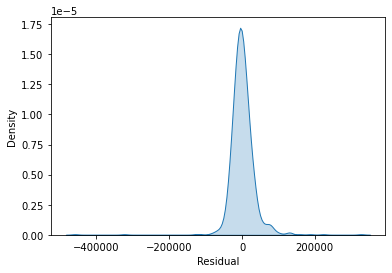

In [54]:
sns.kdeplot(df_residual["Residual"],fill=True)

### 7.1 Mean_squared_error

In [55]:
mse=mean_squared_error(y_train,y_pred)
print("mean squared error:",mse)

mean squared error: 1191238774.4401472


### 7.2 Mean_absolute_error

In [56]:
mae=mean_absolute_error(y_train,y_pred)
print("mean absolute error:",mae)

mean absolute error: 20986.149143136132


### 7.3 r2_score

In [57]:
r2_score=r2_score(y_train,y_pred)
print("r2_score:",r2_score)

r2_score: 0.8002802057837622


In [58]:
y_pred1=model.predict(x_test)
y_pred1

array([151312.60347058, 308639.22480621, 111410.79478846, 175057.32655051,
       290313.10527561,  67326.1305676 , 230998.70782536, 163278.13473912,
        64382.9602275 , 152144.9664778 , 148657.981207  , 110377.89157384,
        83055.74773655, 208697.05415341, 177925.06003412, 138009.76788151,
       205929.27758223, 133143.55704291, 115483.7107592 , 228292.59620039,
       183242.17283588, 207196.64008368, 186217.94929608, 128104.64320989,
       205502.79406527, 162404.80607164, 194780.02667688,  83689.46030755,
       180775.54771945, 195937.36185313, 115927.14153665, 269243.67803579,
       229626.77233762,  84519.23075238, 267500.77613994, 157617.6683976 ,
       149197.52244029, 211999.56636507, 294067.55465303,  81884.5508187 ,
       130245.41420493, 243228.89906084, 100745.95312789, 283139.51981874,
       125255.3579277 , 136556.54178088,  91205.16025135, 125922.33174   ,
       363383.34485487, 130661.99944563, 105699.78530773, 210232.17929461,
       107089.62778249, 3

In [59]:
y_pred1.shape

(292,)

In [60]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [61]:
y_test-y_pred1

892      3187.396529
1105    16360.775194
413      3589.205212
522    -16057.326551
1036    25186.894724
            ...     
479    -39145.524727
1361    22988.608900
802    -18948.398839
651       272.454385
722     27883.714773
Name: SalePrice, Length: 292, dtype: float64

In [62]:
df_residuals1=pd.DataFrame()
df_residuals1["Residuals"]=y_test-y_pred1

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

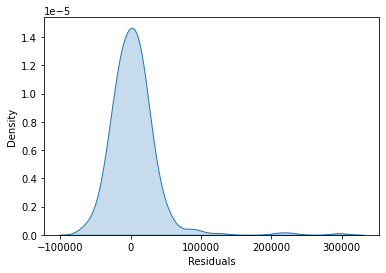

In [63]:
sns.kdeplot(df_residuals1["Residuals"],fill=True)

In [64]:
mse=mean_squared_error(y_test,y_pred1)
mse


1324299820.8339639

In [65]:
mae=mean_absolute_error(y_test,y_pred1)
mae

22385.12386319412

In [66]:
rmse=np.sqrt(mse)
rmse

36390.930474968125

In [67]:
R2_score=metrics.r2_score(y_test,y_pred1)
R2_score

0.8273476531424322